### Student Information
Name: Antoine Stempfer

Student ID: X1085034

GitHub ID: Bassintag

Kaggle name: Bassintag

Kaggle private scoreboard snapshot:

[Snapshot](./pic.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

# Exercise 1

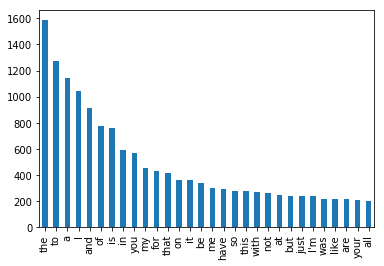

In [2]:
# Answer here
import matplotlib.pyplot as plt
%matplotlib inline

train_df.text.str.split(expand=True).stack().value_counts()[:30].plot(kind='bar')

# Exerise 2

In [3]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

vecorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

vecorizer.fit(train_df['text'])

train_data_vec = vecorizer.transform(train_df['text'])

vecorizer.get_feature_names()[100:110]

/usr/local/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

# Exercise 3

The confusion matrix shows the predicted labels against the acutal true labels

We can see for example that out of 84 actual anger tweets, 55 were accurately predicted, 16 were predicted as fear, 9 as joy and 4 as sadness.

We get similar results on the other rows which means that we get relatively accurate results.

# Exercise 4

In [4]:
from sklearn.naive_bayes import MultinomialNB

X_train = vecorizer.transform(train_df['text'])
y_train = train_df['emotion']

X_test = vecorizer.transform(test_df['text'])
y_test = test_df['emotion']

mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)


y_test_pred[:10]

array(['anger', 'anger', 'fear', 'fear', 'sadness', 'anger', 'fear',
       'fear', 'fear', 'fear'], dtype='<U7')

# Exercise 5

In [5]:
# Answer here
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[ 58  19   3   4]
 [  4 103   2   1]
 [  3  13  57   6]
 [  2  21   6  45]]


We are getting better results than by using desision tree

Accurate results for each emotion are all better:

- 58 vs 55
- 103 vs 70
- 57 vs 54
- 45 vs 42

We can deduce than this model might be more appropriate for this task

# Kaggle report

## Loading data

First I parsed the json input to create a Pandas dataframe using only relevant data, I decided to keep tweetId (used as index to speed up the computation), text and hashtags (which I didn't end up using).

Before parsing the data I had loaded the training/testing data identification into a separate dataframe, this allows me to tag the data from the json file as testing or training

```python
cols = ['tweet_id', 'text', 'hashtags', 'train']

with open('tweets_DM.json') as jf:
	parsed_lines = [json.loads(line)['_source']['tweet'] for i, line in enumerate(jf)]
	data = [[
		parsed['tweet_id'],
        parsed['text'],
		parsed['hashtags'],  # Unused
		df_class.loc[parsed['tweet_id']]['identification'] == 'train' # Training / Testing ?
	] for parsed in parsed_lines]

df = pd.DataFrame(data, columns=cols).set_index('tweet_id')
```

## Preparing for feature extraction

For the data preparation I used multiple techniques in order to reduce the number of features as much as possible and to also remove meaningless features.

First I noticed that nltk has a Tokenizer made especially for tweets so I decided to use it instead of the default one. I also removed the "lh" tags from the tweets as they are not part of the user input. I also removed all punctuation and numbers (using a regexp) from the sentence to only keep words.

Finally I used an english stemmer on each word to remove as much variation as posible

```python
tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True) # NLTK Tokenizer for tweets

stemmer = SnowballStemmer("english")

d = re.compile('^\d+$') # Match words only made of digits 

def clean_word(w):
    return stemmer.stem(w) # Apply stemmer to word

def clean_sentence(s):
    tokens = tokenizer.tokenize(s.lower()) # Tokenize lowercased sentence
    ret = []
    for t in tokens: # For each word (token)
        if t in string.punctuation or t == '<lh>' or d.match(t):  
            continue # Ignore if <lh> token or is punctuation or is only digits
        ret.append(clean_word(t)) # push to out aray
    return ' '.join(ret) # joins as one string
    

df['text'] = df['text'].apply(clean_sentence)
```

## Feature extraction

To extract features I then used a TfidfVectorizer from SkLearn with english stopwords

```python
vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

vectorizer.fit_transform(train_df['text'])
```

## Training

I then trained a RandomForestClassifier with the training data

```python
X_train = vectorizer.transform(train_df['text'])
y_train = train_df['emotion']

X_test = vectorizer.transform(test_df['text'])

rnb = RandomForestClassifier(n_estimators=20, random_state=0)

model = rnb.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
```

## What went wrong ?

The results from this are very bad, having only a laptop with no gpu and 8gb of RAM I was a little bit limitted as to how much testing I could do. Training this very simple classifier takes arround 6 hours on my computer. Even worse I was testing with much bigger feature sizes, I crashed my computer multiple time by running out of ram (after multiple hours of waiting). In the end I should have looked into cloud computing solutions but I didn't have enough time to look into it.

That being said, I learned a lot about the different types of classifier, how they work and how to adapt their settings based on the task to accomplish.